First we'll import the NetworkX package. We'll also import matplotlib.pyplot for some plotting later on.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Q1 - Zachary Karate Club

The Zachary Karate Club network is one of the most well known examples in the field of network science. It consists of data on 34 members of a US university karate club. The data was collected by social scientist Wayne Zachary. During the running of the karate club, a falling out occurred between the club president and the club instructor. Consequently, the interactions different members had with each other depended on whether an individual sided with and was more connected to the club president, or whether the individual sided with and was more connected to the club instructor Quite literally, the club broke into two divided communities after the falling out.

The data collected by Zachary consists of which other club members each individual interacted with. This data is essentially the adjacency matrix of an undirected graph consisting of 34 nodes. The Zachary Karate Club network is such a famous example that the data is already held within the NetworkX package - we don't even need to read it in. To create the karate club graph we just need to run the karate_club_graph() function of the NetworkX package. Let's do that.

In [2]:
G_karate = nx.karate_club_graph()

Let's plot the karate club graph without any communities overlaid

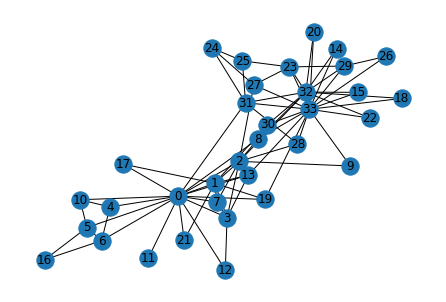

In [3]:
nx.draw(G_karate, with_labels=True, pos=nx.spring_layout(G_karate, seed=1729))

Node 0 corresponds to the club instructor, whilst node 33 correspond to the club president. You can see by eye, how the graph consists largely of two sub-graphs, one centred on node 0 and one centred on node 33.

We'll now run a community detection algorithm over the karate club graph. We'll use the greedy modularity maximization algorithm from the NetworkX package. Since we have good a priori evidence that there are two communities within this graph (and only two) we'll constrain the community detection algorithm to only finding two communities. We do this setting both the cutoff parameter and the best_n parameter equal to the number of communities we want to find.

In [4]:
communities_karate = nx.community.greedy_modularity_communities(G_karate, cutoff=2, best_n=2)

We can look at the node that the community detection algorithm has assigned to each community.

In [5]:
communities_karate

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21}),
 frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33})]

We can clearly see from the node sets above that one set contains node 0, the club instructor, whilst the other set contains node 33, the club president

Let's color the nodes according to which community we think they are in. We'll use the same piece of code we used in the code example in the Chapter 10, which first creates a dictionary mapping node IDs to a color, and then uses the dictionary to map the node indexes to colors.

In [6]:
community_colors_karate = ['lightblue', 'orange']
color_dict_karate = {}
for i in range(len(communities_karate)):
    x = list(communities_karate[i])
    for j in range(len(x)):        
        color_dict_karate[x[j]] = community_colors_karate[i]

color_map_karate = [color_dict_karate[node] for node in G_karate.nodes]

Now we can draw the karate club graph again, but this time with the node colorings. We'll make sure the graph layout is the same as before to make comparison with the previous plot easier.

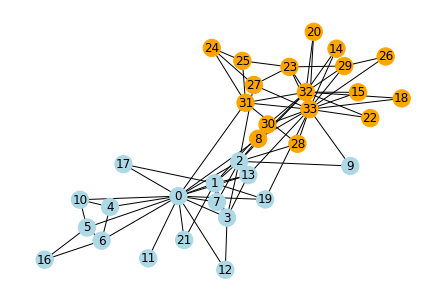

In [7]:
nx.draw(G_karate, with_labels=True, node_color=color_map_karate, pos=nx.spring_layout(G_karate, seed=1729))

The two distinct communities, centred on node 0 and node 33, are much clearer now. Whilst there are some individual that interacted with both communities, we can clearly see examples of nodes that interact soley with their own community. The dividion within the club is painfully clear.

## Q2 - Scale-free graph

We'll use the scale_free_graph function of the NetworkX package to genenerate a large scale-free graph. We'll use the default settings of this function, so the only parameter we need to specify is the number of nodes we want in the graph. We'll set this to n=10000 to generate a graph with 10000 nodes.

In [8]:
G_scale_free = nx.scale_free_graph(n=10000)

We can then use the degree function to count the node degree value. If we just pass the graph into the degree function we get the node degree value for every node in the network. It is returned as a DiMultiDegreeView object. We can convert this to a dictionary by putting passing the DiMultiDegreeView object into the python dictionary constructor. We can extract the values from the dictionary into a list and sort it.

In [9]:
# Get the node degree values as a dictionary
node_degrees_scale_free_dict = dict(nx.degree(G_scale_free))

# Extract the node degree values into a list and sort in descending order
node_degrees = list(node_degrees_scale_free_dict.values())
node_degrees.sort(reverse=True)

Now let's plot those sorted degree values against their rank (1 being the highest degree value) on a log-log scale.

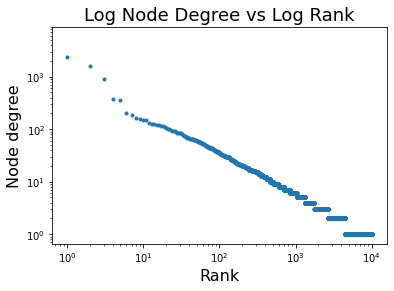

In [10]:
plt.plot(node_degrees, linestyle='None',marker='o', markersize = 3.0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rank", fontsize=16)
plt.ylabel("Node degree", fontsize=16)
plt.title("Log Node Degree vs Log Rank", fontsize=18)
plt.show()

## Q3 - Average shortest-path distance in a small-world network
We'll use the watts_strogatz_graph function to generate a series of small-world networks of different sizes (number of nodes $N$), and then use the shortest_path_length function to calculate the shortest-path distances between each pair of nodes in the networks. From this we can calculate the average shortest-path distance for each value of $N$. We can then plot this average-shortest-path distance against $\log N$, and we expect this relationship to be linear.

Note that we don't actually need to calculate all $N^{2}$ shortest-path distances between all pairs of nodes in a graph of size $N$. Since distances are symmetric, i.e. the shortest path diastance from $i$ to $j$ is the same as the shortest-path distance from $j$ to $i$, and the distance from $i$ to itself is 0, then we only need to calculate the distances for the $N(N-1)/2$ node pairs where $j > i$. We can then apply a correction factor (that only depends on $N$) at the end to work out the average shortest-path distance over all $N^{2}$ node pairs. See if you can work out what the correction factor should be.

Warning, this calculation can take a few minutes to run.

In [11]:
# Set the numpy random number generator seed.
# This will ensure reproducibility of the results when we 
# re-run the code.
np.random.seed(1543)

# Define the graphs sizes in a list
n_nodes = [10,20,40,80,160,320,640,1280]

# Initialize an empty array to hold the mean shortest path distance for each graph size
d_bar = np.full(len(n_nodes), np.nan)

# Loop over the different graph sizes and generate a small-world grap 
# using the Strogatz and Watts algorithm.
for i in range(len(n_nodes)):
    # Set the number of nodes
    n=n_nodes[i]
    
    # Generate the small-world graph
    G_smallworld = nx.watts_strogatz_graph(n=n, k=5, p=0.3, seed=np.random)
    
    # Initialize an empty array to hold the shortest-path distances
    shortest_path_lengths = np.zeros(int((n*(n-1))/2))
    
    # Loop over the N^2 pair of nodes. 
    # In fact, since the shortest-path distance from node i to 
    # node j is the same as from node j to node i, and the shortest distance 
    # from node i to itself is zero, we only need to compute the shortest-path 
    # distances between the N*(N-1)/2 node pairs where j > i. We can then take 
    # the average shortest-path distance for these N*(N-1)/2 node pairs and the 
    # apply a correction factor at the end.
    counter = 0
    for j in range(n-1):
        for k in range(j+1, n):
            # Calculate the shortest-path distance for the current node pair
            shortest_path_lengths[counter] = nx.shortest_path_length(G_smallworld, source=j, target=k)
            counter += 1
            
    # Compute the mean shortest-path distance and apply the correction factor
    d_bar[i] = (1.0 - (1.0/n))*np.mean(shortest_path_lengths)

Now we'll plot the average shortest-path distance against $\log N$.

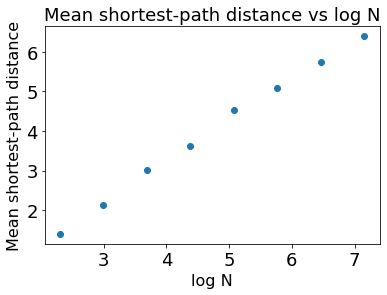

In [12]:
# Plot the results
plt.scatter(x=np.log(n_nodes), y=d_bar ,marker='o')
plt.xlabel("log N", fontsize=16)
plt.ylabel("Mean shortest-path distance", fontsize=16)
plt.title("Mean shortest-path distance vs log N", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()